In [3]:
%cd "../DFungi_dataset"

c:\Users\Usuario\Documents\Universidad\Semestre 10\Computación\M2 IA\DFungi_AITraining\DFungi_dataset


In [2]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from PIL import Image, UnidentifiedImageError
import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%cd "../DFungi_dataset"

c:\Users\Usuario\Documents\Universidad\Semestre 10\Computación\M2 IA\DFungi_AITraining\DFungi_dataset


In [12]:
# Añadir los paths de las carpetas de 'train' y 'test'
train_dir = os.path.join('train')
test_dir = os.path.join('test')

# Empezamos con generación de datos en una variable llamada 'train_datagen'.
# Entrenamos el modelo al mismo tiempo que la generación de datos para no
# perder el tiempo y hacer uso óptimo de la RAM.

# Usamos la función ImageDataGenerator de TensorFlow
train_datagen = ImageDataGenerator(
							rescale = 1./255, # Reescalamos las imágenes
							rotation_range = 10, # Las rotamos levemente (10 grados)
							width_shift_range = 0.2, # Permitimos que se ensanche la imagen
							zoom_range = 0.3, # Hacemos zoom
							horizontal_flip = True, #Volteamos la imagen
                            validation_split=0.10
                            )



Found 6648 images belonging to 5 classes.


<Figure size 640x480 with 0 Axes>

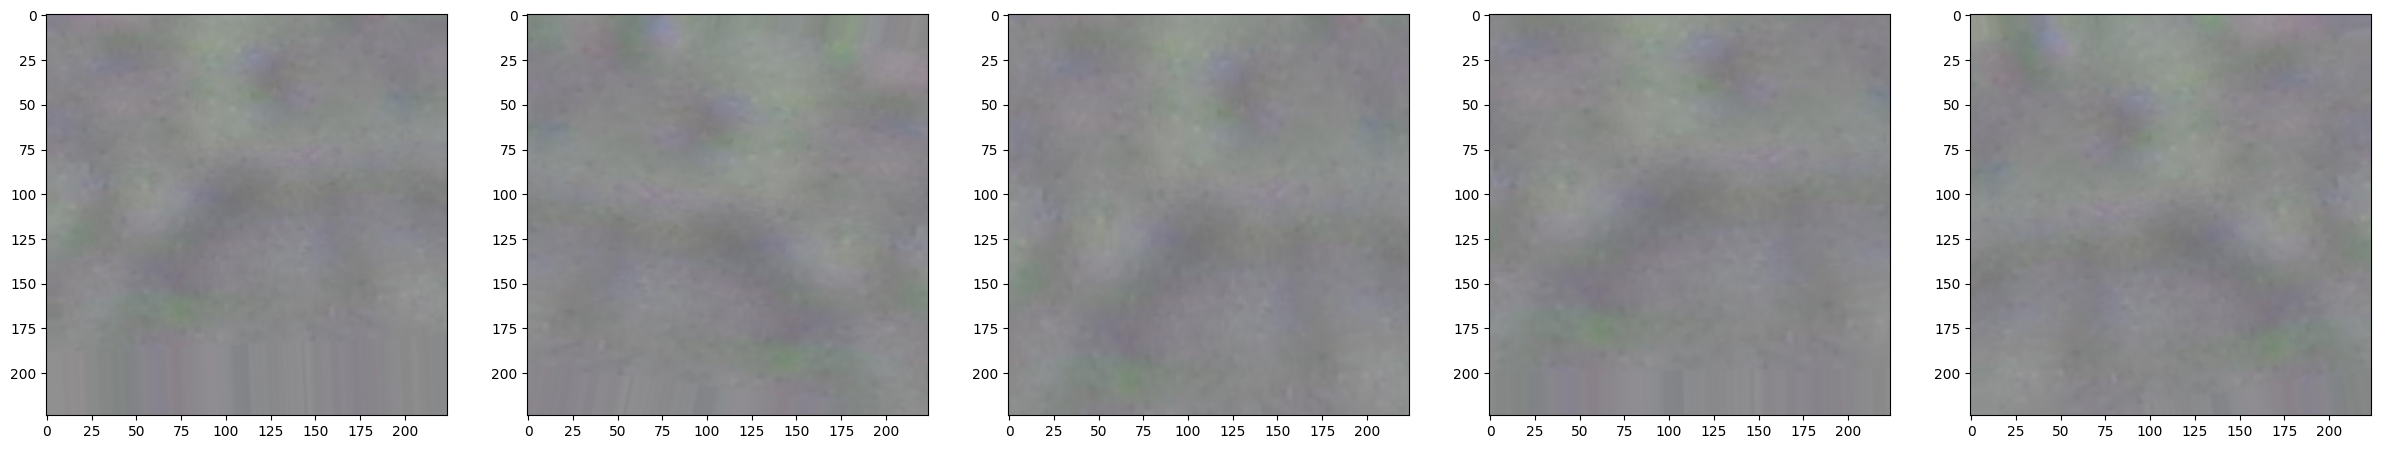

In [ ]:
# TRAINING (DE PRUEBA)
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
train_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							# batch_size = 1 porque la RAM es un relajo XD
							subset='training',
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# Creamos el formato del plot para mostrar las imágenes
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

# Mostrar las primeras 5
for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [ ]:
# VALIDATION
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
validation_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							# batch_size = 1 porque la RAM es un relajo XD
							subset='validation',
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# TEST
#Un rápido pre-procesamiento de datos
test_datagen = ImageDataGenerator(rescale=1./255) #Reescalamos las imágenes de test

# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
test_generator = test_datagen.flow_from_directory(
							test_dir, # le damos el path de test
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							# batch_size = 1 porque la RAM es un relajo XD
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

Found 736 images belonging to 5 classes.
Found 1837 images belonging to 5 classes.


Found 7384 images belonging to 5 classes.
(8, 224, 224, 3)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

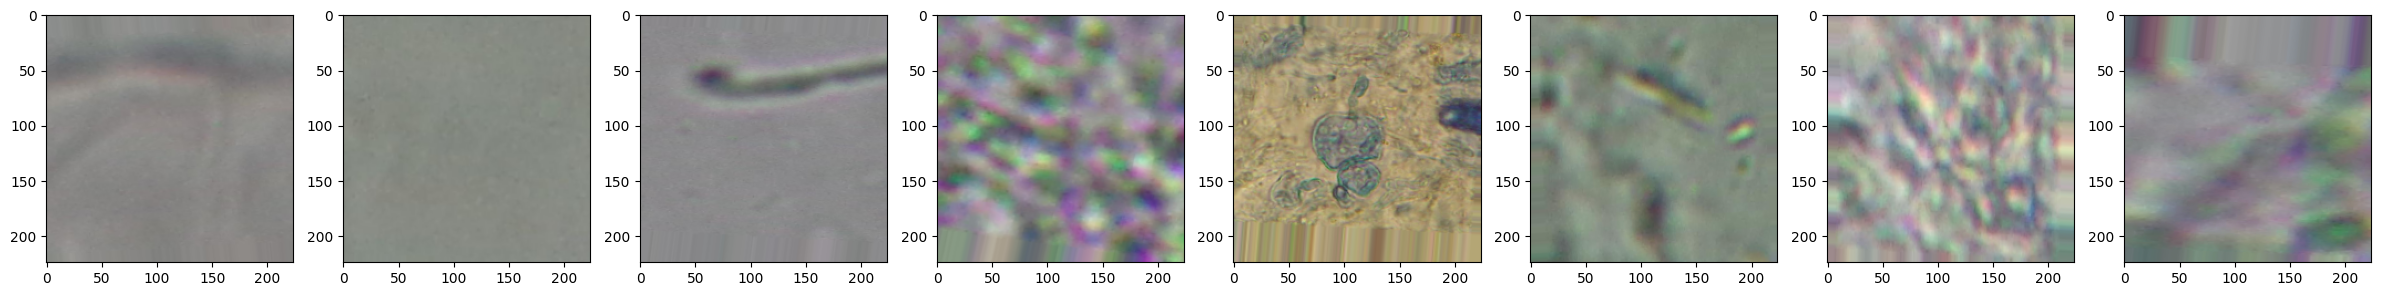

In [ ]:
# TRAINING (OFICIAL)
train_generator = train_datagen.flow_from_directory(
							train_dir,# le damos el path de entrenamiento
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							batch_size = 8, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [ ]:
# Path de los contenidos del dataset
path = "../DFungi_dataset"

# DATA AUGMENTATION
train_generator = train_datagen.flow_from_directory(
							"../DFungi_dataset/train",
							target_size = (224, 224),
							batch_size = 64,
							class_mode ='categorical',
							save_to_dir= path + '/augmented', # Guardar los nuevos archivos en la carpeta augmented
              save_prefix='aug', # Que todas las imágenes tengan el prefijo aug
              save_format='png' # Asegurar que todas las imágenes tengan el formato png
							)

Found 7384 images belonging to 5 classes.


In [ ]:
# Inicio de la red neuronal convolutiva
# Inspirada en la arquitectura RGG16

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers


# Tamaño del input (pixeles de las imágenes)
input_shape = (224,224,3)
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanar el modelo de 3D a 1D para las Dense Layers
model.add(layers.Flatten())

# Dense layers = número de clases que tiene el dataset
num_classes = 5
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

# Compilar el modelo
model.compile(loss='categorical_crossentropy', # Categorical Crossentropy for multi-class classification with one-hot labels
						optimizer='adam',
						metrics=['accuracy']) # Accuracy to evaluate performance


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 110, 110, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 108, 108, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │       865,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,437 (3.43 MB)

 Trainable params: 900,437 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ESTA REVISIÓN DE ARCHIVOS FUE HECHA POR GEMINI AI PARA REVISAR LOS ARCHIVOS
# UNO POR UNO DEBIDO A QUE SALÍA UN ERROR DONDE NO SE PODÍA ENTRENAR EL MODELO
# POR QUE LOS ARCHIVOS ESTABAN O CORRUPTOS, O INCORRECTOS. TRAS CONSULTAR CON LA
# IA CÓMO REVISAR MIS DOCUMENTOS, HIZO PROPUESTA DE UN DEBUGGING REVISANDO SI
# ALGUNO DE LOS ARCHIVOS ESTABA CAUSANDO EL PROBLEMA. ENCONTRÓ UNA IMAGEN
# CORRUPTA DE ENTRE 9000. TRAS ELIMINARLA, EL MODELO ENTRENÓ SIN PROBLEMA. SIN
# EMBARGO, EXPLICO EL CÓDIGO DEL SIGUIENTE BLOQUE CON MIS PALABRAS.

# Inicializar array con los paths que se tienen que revisar.
image_paths_to_check = []

# 'walk' a través de la carpeta del dataset
for root, _, files in os.walk("../DFungi_dataset"):
    for file in files: # por cada archivo en la carpeta
        # si la imagen termina con alguno de los formatos de imagen...
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # ... se añade el path del archivo al array paths_to_check
            image_paths_to_check.append(os.path.join(root, file))

# Compartir mensaje de la cantidad de imágenes que se están analizando
print(f"Checking {len(image_paths_to_check)} potential image files...")

# Inizializar array para guardar los paths problemáticos (en caso de haberlos)
problematic_files = []

# Para cada archivo en paths_to_check
for img_path in image_paths_to_check:
    try:
        # Abrir y leer el archivo
        with open(img_path, 'rb') as f:
            img_bytes = f.read()
        Image.open(io.BytesIO(img_bytes))
    # Si hay un error y no puede abrirlo
    except UnidentifiedImageError:
        # Añadir el path al array problematic_files
        problematic_files.append(img_path)
        # Imprimir mensaje de error
        print(f"ERROR: Could not identify image file: {img_path}")
    except Exception as e:
        print(f"OTHER ERROR for {img_path}: {e}")

# Si hubo archivos problemáticos, se imprimen en resumen
if problematic_files:
    print("\n--- Summary of Problematic Files ---")
    for p_file in problematic_files:
        print(p_file)
else:
    # Si no hubo, imprime un mensaje de éxito
    print("\nSuccess! No problematic image files found during manual check.")


Checking 9221 potential image files...

No problematic image files found during manual check.


In [ ]:
# Entrenar el modelo
history = model.fit(
						train_generator,
						epochs = 5,
                        validation_data = validation_generator,
						)


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.4965 - loss: 1.2497 - val_accuracy: 0.2160 - val_loss: 1.3333
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.5721 - loss: 1.0501 - val_accuracy: 0.5177 - val_loss: 1.2582
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.6396 - loss: 0.9257 - val_accuracy: 0.4946 - val_loss: 1.2000
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.6479 - loss: 0.9319 - val_accuracy: 0.5285 - val_loss: 1.3005
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.6428 - loss: 0.9302 - val_accuracy: 0.4986 - val_loss: 1.3432


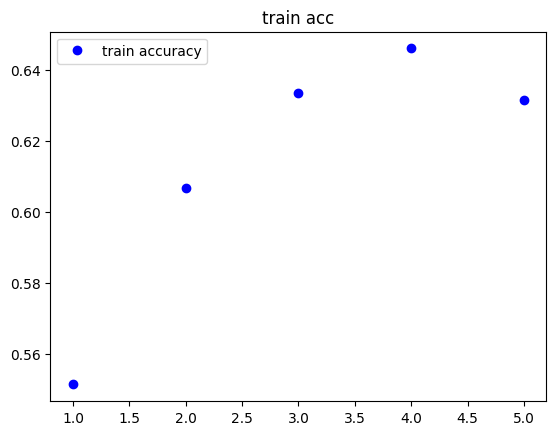

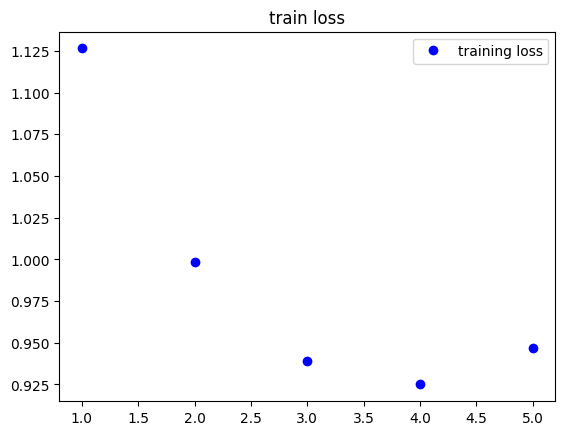

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
# Evaluar el modelo usando la selección de imágenes en test
test_loss, test_accuracy = model.evaluate(test_generator)
# Imprimir accuracy con info de test
print(f"Test Accuracy: {test_accuracy}")

1837/1837 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.5813 - loss: 1.0970
Test Accuracy: 0.579749584197998


              precision    recall  f1-score   support

          H1       0.48      0.70      0.57       891
          H2       0.27      0.08      0.13       474
          H3       0.00      0.00      0.00       162
          H5       0.10      0.04      0.05       162
          H6       0.06      0.13      0.08       148

    accuracy                           0.37      1837
   macro avg       0.18      0.19      0.17      1837
weighted avg       0.32      0.37      0.32      1837



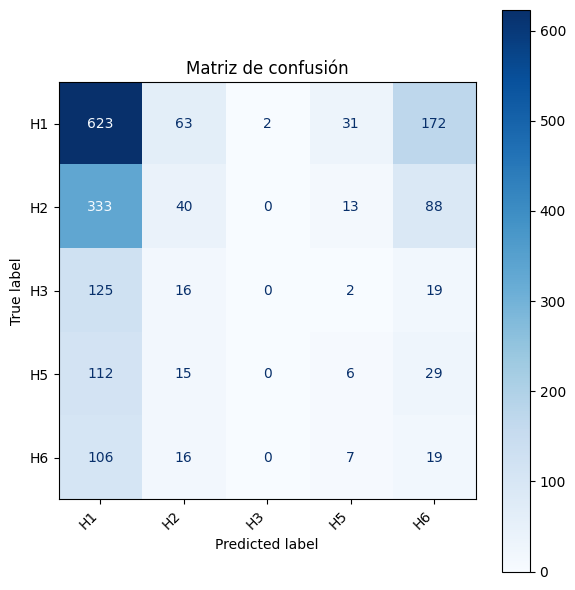

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# CONFUSION MATRIX

# Y_TRUE Classes de generador
y_true = test_generator.classes
# Y_PRED Predicciones por imagen
y_pred = np.argmax(model.predict(test_generator, verbose=0), axis=1)
# LABELS claves de las clases
labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión para comparar predicción contra realidad
confusion_matrixx = confusion_matrix(y_true, y_pred) # X=Clase a la que pertenece Y=Predicción del modelo
# Imprimir el reporte con los datos del modelo (métricas de precisión, recall, f1 y support)
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
# Display
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrixx, display_labels=labels)

# Formato del plot
plt.figure(figsize=(6, 6))
disp.plot(include_values=True, cmap=plt.cm.Blues, ax=plt.gca(), colorbar=True)
plt.title("Matriz de confusión")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import json
# Guardar las clases en un json
json.dump(train_generator.class_indices, open('class_indices.json', 'w'))
# Guardar el modelo
model.save('model.keras')

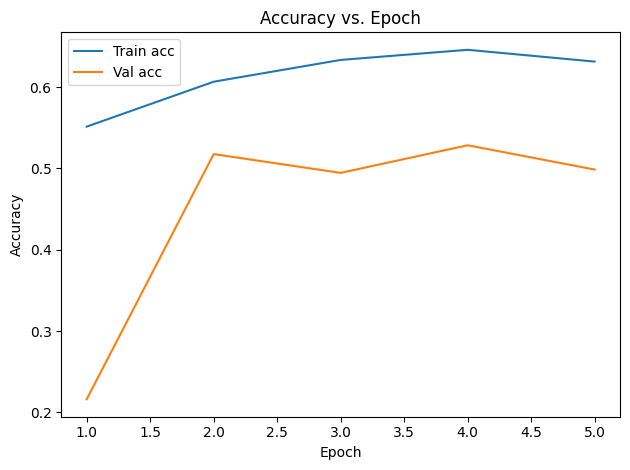

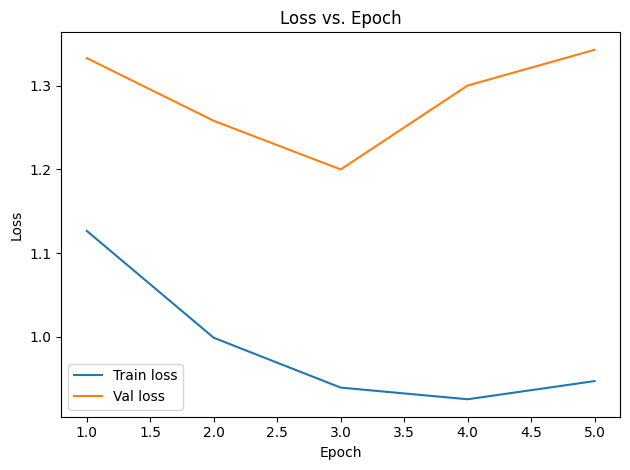

In [ ]:
# Graficar la historia del entrenamiento
acc  = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Evaluación del modelo Accuracy vs. Epoch
plt.figure()
plt.plot(epochs, acc,     label="Train acc")
plt.plot(epochs, val_acc, label="Val acc")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout()
plt.show()

# Evaluación del modelo Loss vs. Epoch
plt.figure()
plt.plot(epochs, loss,     label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout()
plt.show()

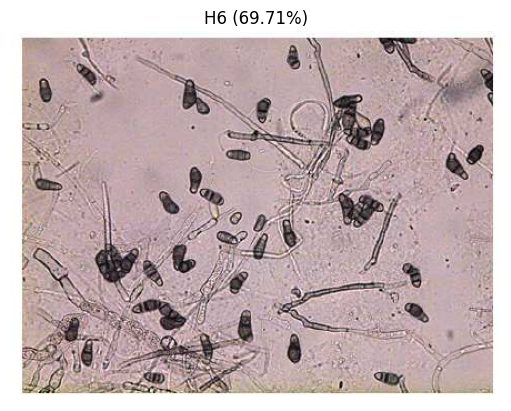

In [18]:
from pathlib import Path
import json

# Variables del Path del modelo y del diccionario de clases
model_path   = Path("../DFungi_dataset/model.keras") #Dónde está el modelo previamente guardado.
classes_path = Path("../DFungi_dataset/class_indices.json") #Dónde está el diccionario de clases del modelo.

# Cargar el modelo
model = tf.keras.models.load_model(model_path)
# Cargar las etiquetas y clases que están en el diccionario.
idx2class = {v: k for k, v in json.load(classes_path.open()).items()}

# Función auxiliar para pre-procesar y predecir
# DESARROLLADA EN APOYO DE LEONARDO SANTIAGO RAMOS (AUTOR ORIGINAL)
def predict_image(img_path): #parámetro de entrada: path de la imagen a evaluar

    # Preprocesamos la imagen para que cumpla los requisitos de la arquitectura del modelo
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224)) # Cargamos imagen y le damos el tamaño estándar
    x   = tf.keras.utils.img_to_array(img) / 255.0 # Reescalamos la imagen
    x   = np.expand_dims(x, 0)

    preds = model.predict(x, verbose=0) # Ejecutamos el modelo
    class_id = int(np.argmax(preds)) # Alimentamos las clases
    conf     = float(np.max(preds))

    return idx2class[class_id], conf, preds[0]

img_path = Path("../Avance2/fungi2_dfh1.png") # Path de la imagen a probar

assert img_path.exists(), f"No se encontró {img_path}" # Manejo de errores, si no encuentra el archivo

predicted_class, confidence, prob_vector = predict_image(img_path) # Ejecutamos la función con la imagen

# Mostramos los resultados del predict
plt.imshow(tf.keras.utils.load_img(img_path))
plt.axis("off")
# Que muestre cuál es la clase que se entiende que es y el porcentaje (con 2 decimales) de seguridad
plt.title(f"{predicted_class} ({confidence:.2%})")
plt.show()